In [2]:
import numpy as np
import matplotlib.pyplot as plt

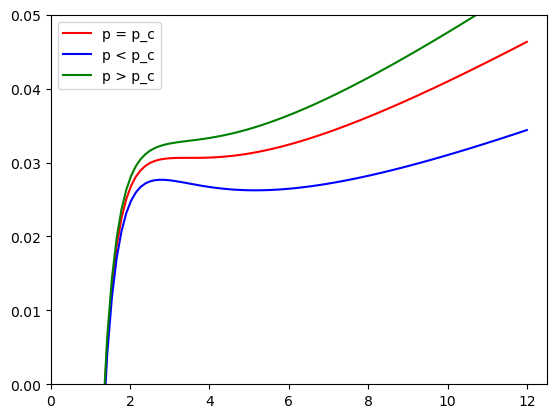

In [3]:
float ; pi = np.pi
float ; p_c = 1 / (2 * 96 * pi)
radius = np.linspace(0.1, 12, 100)

def T(r, p):
    return (8 * p * pi * r ** 4 + r ** 2 - 2) / (4 * pi * r ** 3)

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlim(0, 12.5)
ax.set_ylim(0, 0.05)
ax.plot(radius, T(radius, p_c), color='red', label='p = p_c')
ax.plot(radius, T(radius, p_c*0.7), color='blue', label='p < p_c')
ax.plot(radius, T(radius, p_c*1.2), color='green', label='p > p_c')
plt.legend()
plt.show()

/var/folders/73/ll390xp94jv43fgzv7zsmncm0000gn/T/ipykernel_21241/1258947357.py:13: RuntimeWarning: divide by zero encountered in divide
  return (6 * pi - s**2) / (4 * np.sqrt(pi) * s ** (5) * np.sin(t))
/var/folders/73/ll390xp94jv43fgzv7zsmncm0000gn/T/ipykernel_21241/1258947357.py:16: RuntimeWarning: divide by zero encountered in divide
  return -(s**2 - 2 * pi) / (2 * np.sqrt(pi) * s ** (3) * np.sin(t) * np.tan(t))
/var/folders/73/ll390xp94jv43fgzv7zsmncm0000gn/T/ipykernel_21241/1258947357.py:20: RuntimeWarning: invalid value encountered in divide
  return phi_s(s, t) / np.sqrt(phi_s(entropy, theta)**2 + phi_t(entropy, theta)**2)
/var/folders/73/ll390xp94jv43fgzv7zsmncm0000gn/T/ipykernel_21241/1258947357.py:23: RuntimeWarning: invalid value encountered in divide
  return phi_t(s, t) / np.sqrt(phi_s(entropy, theta)**2 + phi_t(entropy, theta)**2)


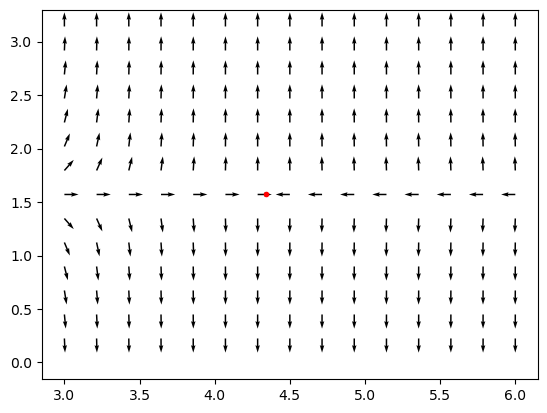

In [4]:
'''
Duan の $phi$-mapping 定理を使って臨界点周りでのトポロジカル電荷を求めていく
温度はエントロピーとその他圧力以外の熱力学変数を使って書けている。
'''

Theta = np.linspace(0, pi, 15) #Phi(theta, S) 関数の定義域を設定
Entropy = np.linspace(3, 6, 15)

entropy, theta = np.meshgrid(Entropy, Theta)

#規格化されていないphiベクトルを各成分ごとに定義
def phi_s(s, t):
    return (6 * pi - s**2) / (4 * np.sqrt(pi) * s ** (5) * np.sin(t))

def phi_t(s, t):
    return -(s**2 - 2 * pi) / (2 * np.sqrt(pi) * s ** (3) * np.sin(t) * np.tan(t))

#phiベクトルを規格化する
def n_s(s, t):
    return phi_s(s, t) / np.sqrt(phi_s(entropy, theta)**2 + phi_t(entropy, theta)**2)

def n_t(s, t):
    return phi_t(s, t) / np.sqrt(phi_s(entropy, theta)**2 + phi_t(entropy, theta)**2)

#phiベクトルを図示する
figure = plt.figure()
ax1 = figure.add_subplot()
ax1.quiver(entropy, theta, n_s(entropy, theta),n_t(entropy, theta),width = 0.003, scale = 35)
ax1.plot(np.sqrt(6 * pi), pi/2, 'o', color='red', markersize=3)
plt.show()

In [5]:
#臨界点の周りで周回積分してトポロジカル電荷を求める

phi = np.linspace(0, 2 * pi, 500) #周回積分なので積分区間は0から2pi

float; a = 0.4 #軌道の半長軸を半短軸
float; b = 0.3

#phiベクトルの変数を theta, S から phiに変更
def x(q): #これまでSと呼んでいた変数
    return a * np.cos(q) + np.sqrt(6 * pi)
def y(q): #これまでthetaと呼んでいた変数
    return b * np.sin(q) + pi / 2

#規格化したphiベクトルの変数をphiに変更
def n_phi_s(q):
    return phi_s(x(q), y(q)) / np.sqrt(phi_s(x(q), y(q))**2 + phi_t(x(q), y(q))**2)

def n_phi_t(q):
    return phi_t(x(q), y(q)) / np.sqrt(phi_s(x(q), y(q))**2 + phi_t(x(q), y(q))**2)

#この後の微分に備えてphiの微少量を設定
float; d_phi = 2 * pi / len(phi)

#規格化されたphiベクトルのphi微分を計算
def d_n_s(q):
    return (n_phi_s(q + d_phi) - n_phi_s(q)) / d_phi

def d_n_t(q):
    return (n_phi_t(q + d_phi) - n_phi_t(q)) / d_phi

#トポロジカル電荷を求めるための被積分関数を定義
def integrand(q):
    return n_phi_s(q) * d_n_t(q) - n_phi_t(q) * d_n_s(q)

list; Omega = []

#積分を各phiごとに実行。phi=2piの値がトポロジカル電荷に対応する
def integral_phi():
    float; sum = 0
    for q in range(len(phi)):
        sum += d_phi * integrand(phi[q])
        Omega.append(sum)
    return sum

integral_phi()

-6.749655743694301

In [6]:
#臨界点を含まない閉経路でも同様の計算を実行
phi = np.linspace(0, 2 * pi, 500)

float; a = 0.3
float; b = 0.5

def x(q):
    return a * np.cos(q) + 5.4
def y(q):
    return b * np.sin(q) + pi / 2

def n_phi_s(q):
    return phi_s(x(q), y(q)) / np.sqrt(phi_s(x(q), y(q))**2 + phi_t(x(q), y(q))**2)

def n_phi_t(q):
    return phi_t(x(q), y(q)) / np.sqrt(phi_s(x(q), y(q))**2 + phi_t(x(q), y(q))**2)

float; d_phi = 2 * pi / len(phi)

def d_n_s(q):
    return (n_phi_s(q + d_phi) - n_phi_s(q)) / d_phi

def d_n_t(q):
    return (n_phi_t(q + d_phi) - n_phi_t(q)) / d_phi


def integrand(q):
    return n_phi_s(q) * d_n_t(q) - n_phi_t(q) * d_n_s(q)

list; Omega_1 = []

def integral_phi_1():
    float; sum = 0
    for q in range(len(phi)):
        sum += d_phi * integrand(phi[q])
        Omega_1.append(sum)
    return sum

integral_phi_1()

-0.6517330156548353

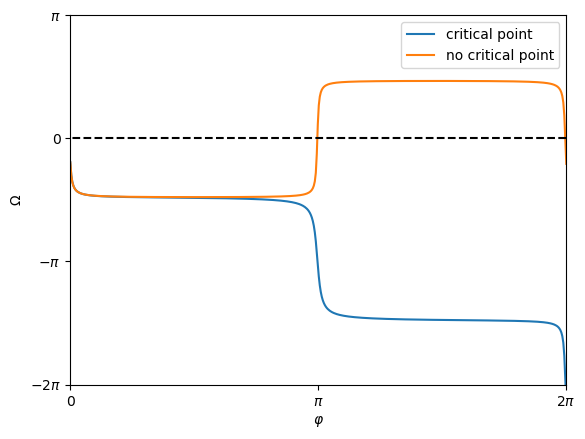

In [20]:
figure = plt.figure()
ax2 = figure.add_subplot()
ax2.set_ylim(-2*pi, pi)
ax2.set_xlim(0, 2*pi)
ax2.set_xlabel(r'$\varphi$')
ax2.set_ylabel(r'$\Omega$')
ax2.set_xticks([0, 3.14, 6.28], ['0', r'$\pi$', r'2$\pi$'])
ax2.set_yticks([-6.28, -3.14, 0, 3.14], [r'$-2\pi$', r'$-\pi$', '0', r'$\pi$'])
ax2.plot(phi, Omega, label='critical point')
ax2.plot(phi, Omega_1, label='no critical point')
ax2.hlines(0, 2*pi, 0, color = 'k' ,linestyle='--')
plt.legend()
plt.show()

